### Importing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

### Reading the data

In [3]:
df=pd.read_csv("PG_Data_Set")

In [4]:
df

,Unnamed: 0,name of pg,Cost,Gender,Location,Distance
0,0,Nain and Lakshya PG/Paying Guest For Girls an...,"₹14,000 Onwards",Coed,"Located in University of Delhi North Campus, ...",0.3 Km from Delhi University Central Science L...
1,1,Blossom Stayz PG/Paying Guest,"₹22,000 Onwards",Coed,"Located in Shakti Nagar, New Delhi, Blossom S...",19.6 Km from Mundka Metro Station
2,2,Blossom Stayz PG/Paying Guest,"₹22,500 Onwards",Girls,"Located in Roop Nagar, New Delhi, Blossom Sta...",1.0 Km from Vishwa Vidyalaya
3,3,Blossom By Hive PG/Paying Guest,"₹15,000 Onwards",Girls,"Move into Blossom By Hive, A Professionally M...",0.4 Km from Sarvodaya Kanya Vidyalaya Shakti N...
4,4,Mannat Girls PG/Paying Guest,"₹14,000 Onwards",Girls,"Located in University of Delhi North Campus, ...",18.2 Km from Mundka Metro Station
...,...,...,...,...,...,...
241,241,Saisha home PG/Paying Guest,"₹22,100 Twin Sharing",Girls,This adroitly planned accomodation having Tri...,1.2 Km from Pulbangash Metro Station
242,242,Saisha homes PG/Paying Guest,"₹19,500 Triple Sharing",Boys,"This PG comprises of rooms like Single, Doubl...",0.2 Km from Hansraj College
243,243,Blossom stayz PG/Paying Guest,"₹16,900 Onwards",Girls,This PG is for students and professionals has...,19.3 Km from Mundka Metro Station
244,244,Apurva PG/Paying Guest,"₹18,900 Triple Sharing",Girls,A good option for Females this PG has Triple ...,1.3 Km from Pulbangash Metro Station


### Cleaning the data
##### In our analysis the name of the pg and location plays no role, so we drop those columns

In [5]:
df1=df.copy()

In [6]:
df1.drop(["name of pg","Location"],axis=1,inplace=True)

In [7]:
df1.rename({"Unnamed: 0":"Sno"},axis=1,inplace=True)

In [8]:
df1

,Sno,Cost,Gender,Distance
0,0,"₹14,000 Onwards",Coed,0.3 Km from Delhi University Central Science L...
1,1,"₹22,000 Onwards",Coed,19.6 Km from Mundka Metro Station
2,2,"₹22,500 Onwards",Girls,1.0 Km from Vishwa Vidyalaya
3,3,"₹15,000 Onwards",Girls,0.4 Km from Sarvodaya Kanya Vidyalaya Shakti N...
4,4,"₹14,000 Onwards",Girls,18.2 Km from Mundka Metro Station
...,...,...,...,...
241,241,"₹22,100 Twin Sharing",Girls,1.2 Km from Pulbangash Metro Station
242,242,"₹19,500 Triple Sharing",Boys,0.2 Km from Hansraj College
243,243,"₹16,900 Onwards",Girls,19.3 Km from Mundka Metro Station
244,244,"₹18,900 Triple Sharing",Girls,1.3 Km from Pulbangash Metro Station


##### Cleaning the cost column

###### for the purpose of this analysis we are only going to look at abosulute cost of all the rooms regardgless of sharing capacity

In [9]:
for i in df1["Cost"]:
    lst=i.split(' ')
    df1.replace(i,lst[0],inplace=True)

In [10]:
df1

,Sno,Cost,Gender,Distance
0,0,"₹14,000",Coed,0.3 Km from Delhi University Central Science L...
1,1,"₹22,000",Coed,19.6 Km from Mundka Metro Station
2,2,"₹22,500",Girls,1.0 Km from Vishwa Vidyalaya
3,3,"₹15,000",Girls,0.4 Km from Sarvodaya Kanya Vidyalaya Shakti N...
4,4,"₹14,000",Girls,18.2 Km from Mundka Metro Station
...,...,...,...,...
241,241,"₹22,100",Girls,1.2 Km from Pulbangash Metro Station
242,242,"₹19,500",Boys,0.2 Km from Hansraj College
243,243,"₹16,900",Girls,19.3 Km from Mundka Metro Station
244,244,"₹18,900",Girls,1.3 Km from Pulbangash Metro Station


In [11]:
for i in df1["Cost"]:
    lst=i.split('₹')
    if len(lst)==1:
        f=lst[0].lower()
    else:
        f=lst[1].lower()
    df1.replace(i,f,inplace=True)

In [12]:
df1

,Sno,Cost,Gender,Distance
0,0,"14,000",Coed,0.3 Km from Delhi University Central Science L...
1,1,"22,000",Coed,19.6 Km from Mundka Metro Station
2,2,"22,500",Girls,1.0 Km from Vishwa Vidyalaya
3,3,"15,000",Girls,0.4 Km from Sarvodaya Kanya Vidyalaya Shakti N...
4,4,"14,000",Girls,18.2 Km from Mundka Metro Station
...,...,...,...,...
241,241,"22,100",Girls,1.2 Km from Pulbangash Metro Station
242,242,"19,500",Boys,0.2 Km from Hansraj College
243,243,"16,900",Girls,19.3 Km from Mundka Metro Station
244,244,"18,900",Girls,1.3 Km from Pulbangash Metro Station


In [13]:
for i in df1["Cost"]:
    lst=i.split(',')
    f="".join(lst)
    df1.replace(i,f,inplace=True)

In [14]:
df1["Cost"]=df1["Cost"].astype(float)

In [15]:
df1

,Sno,Cost,Gender,Distance
0,0,14000.0,Coed,0.3 Km from Delhi University Central Science L...
1,1,22000.0,Coed,19.6 Km from Mundka Metro Station
2,2,22500.0,Girls,1.0 Km from Vishwa Vidyalaya
3,3,15000.0,Girls,0.4 Km from Sarvodaya Kanya Vidyalaya Shakti N...
4,4,14000.0,Girls,18.2 Km from Mundka Metro Station
...,...,...,...,...
241,241,22100.0,Girls,1.2 Km from Pulbangash Metro Station
242,242,19500.0,Boys,0.2 Km from Hansraj College
243,243,16900.0,Girls,19.3 Km from Mundka Metro Station
244,244,18900.0,Girls,1.3 Km from Pulbangash Metro Station


### Cleaning the distance column
##### For the purpose of the study we are only going to look at absolute distance since we are looking at various pg's located near different colleges

In [16]:
for i in df1["Distance"]:
    lst=i.split(' ')
    df1.replace(i,(lst[0]),inplace=True)

In [17]:
df1["Distance"]=df1["Distance"].astype(float)

In [18]:
df1

,Sno,Cost,Gender,Distance
0,0,14000.0,Coed,0.3
1,1,22000.0,Coed,19.6
2,2,22500.0,Girls,1.0
3,3,15000.0,Girls,0.4
4,4,14000.0,Girls,18.2
...,...,...,...,...
241,241,22100.0,Girls,1.2
242,242,19500.0,Boys,0.2
243,243,16900.0,Girls,19.3
244,244,18900.0,Girls,1.3


### Preparing data for visualization

In [19]:
df1["Sno"]=1

In [20]:
df["Gender"].value_counts()

Girls    161
Boys      47
Coed      38
Name: Gender, dtype: int64

In [21]:
df2=df1.copy()
df2.sort_values("Gender",inplace=True)
df2.set_index(["Gender","Sno"],inplace=True)

In [22]:
df2

Cost  Distance
Gender Sno                   
Boys   1    15000.0       1.7
       1    25000.0       0.3
       1    10000.0      19.0
       1     5000.0       0.4
       1    14300.0      20.1
...             ...       ...
Girls  1    18000.0       0.7
       1    16500.0       0.2
       1    17600.0       1.0
       1    12999.0      19.0
       1    13000.0       0.2

[246 rows x 2 columns]

In [23]:
df1.groupby("Gender").sum()

,Sno,Cost,Distance
Gender,,,
Boys,47,645200.0,325.8
Coed,38,439800.0,266.7
Girls,161,2279699.0,1093.1


In [83]:
print("Avg cost for boys pg")
print(645200/47)
print("Avg cost for girls pg")
print(2279699/161)
print("Avg cost for coed pg")
print(439800/38)

Avg cost for boys pg
13727.659574468085
Avg cost for girls pg
14159.621118012423
Avg cost for coed pg
11573.684210526315


# Visualization
#### To find correlation between cost and distance

In [25]:
df3=df1.drop("Sno",axis=1)

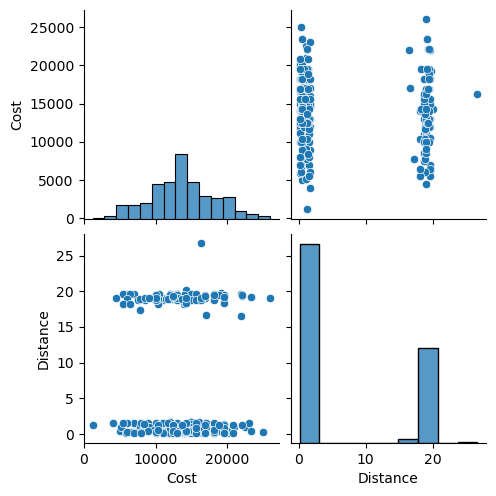

In [29]:
sns.pairplot(df3)

### Observation
- We can see that most PG's are within 5km of the respective college.
- One third of the PG's registered on the website lie nearly 20km apart from the college.
- The cost of the PG's is nearly normally distributed

<AxesSubplot:>

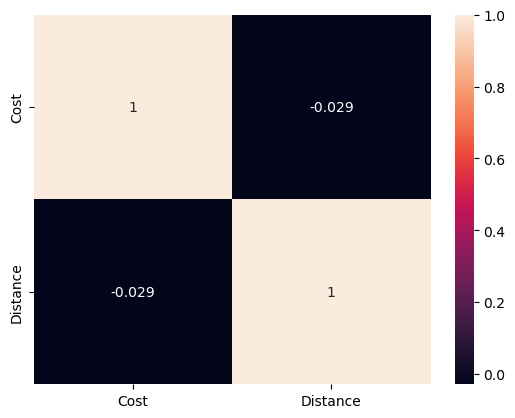

In [26]:
sns.heatmap(df3.corr(),annot=True)

### observations
- We can see that cost and distance are negative correlated, this means that as the distance from college increase the cost of pg decreases

{'whiskers': [<matplotlib.lines.Line2D at 0x211a426f820>,
 'caps': [<matplotlib.lines.Line2D at 0x211a426fdc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x211a426f550>],
 'medians': [<matplotlib.lines.Line2D at 0x211a42853a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x211a4285670>],
 'means': []}

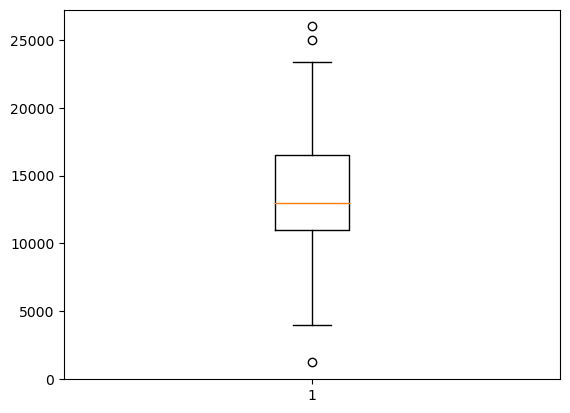

In [27]:
plt.boxplot(df3["Cost"])


### Observation
- We can see that in general most PG's cost somewhere between 12 and 16 thousand with a median cost of 13,382
- A few outliers can be noticed that cost more than 24,000 and less than 4,800

### Gender wise cost

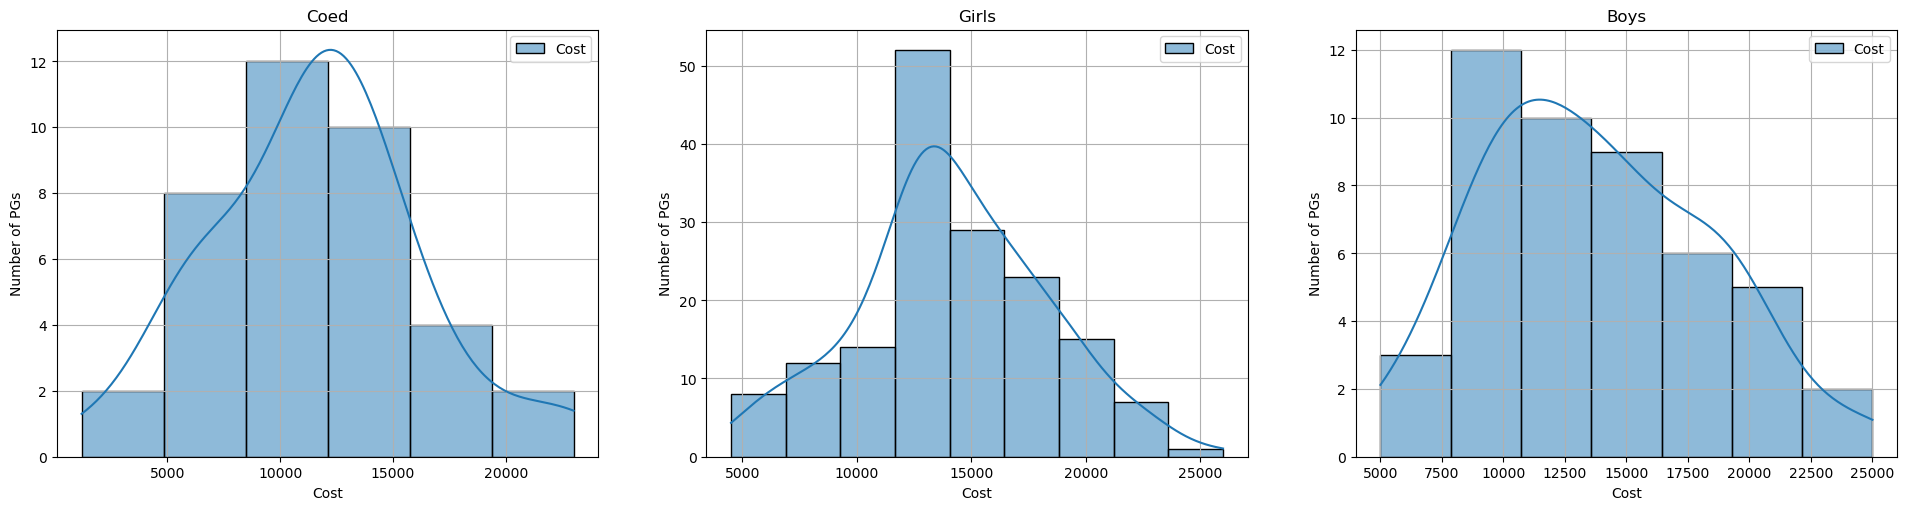

In [97]:
plt.subplot(1,3,1)
sns.histplot(df3[df3["Gender"]=="Coed"].drop("Distance",axis=1),bins=6,kde=True)
plt.grid()
plt.title("Coed")
plt.xlabel("Cost")
plt.ylabel("Number of PGs")

plt.subplot(1,3,2)
sns.histplot(df3[df3["Gender"]=="Girls"].drop("Distance",axis=1),bins=9,kde=True)
plt.grid()
plt.title("Girls")
plt.xlabel("Cost")
plt.ylabel("Number of PGs")

plt.subplot(1,3,3)
sns.histplot(df3[df3["Gender"]=="Boys"].drop("Distance",axis=1),bins=7,kde=True)
plt.grid()
plt.title("Boys")
plt.xlabel("Cost")
plt.ylabel("Number of PGs")

plt.subplots_adjust(left=None, bottom=None, right=3, top=1, wspace=None, hspace=None)
plt.show()

### Observations
- The coed and girls graph has a close resemblance to normal distribution
- For coed, majority pg's are found in the range of 9000-11000. This is less than the avg price of 11567. Thus data is slightly right skewed.
- For girls, majority pg's are found in the range of 12000-14000. This is less than the average of 14447. Thus the data is slightly right skewed.
- For boys, majority pg's are found in the range of 7500-11000. This is far less than the average of 12656. Thus the data is extremely right skewed.

### Gender wise Distance

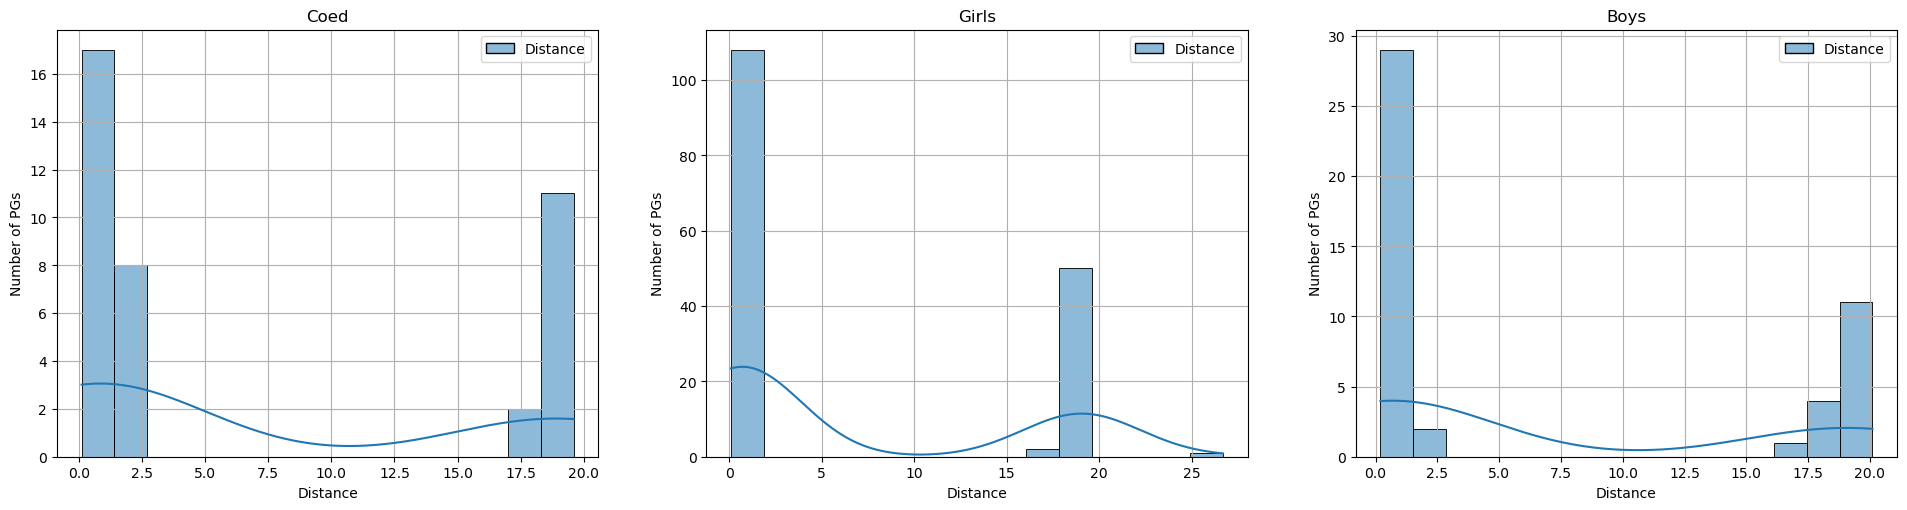

In [104]:
plt.subplot(1,3,1)
sns.histplot(df3[df3["Gender"]=="Coed"].drop("Cost",axis=1),bins=15,kde=True)
plt.grid()
plt.title("Coed")
plt.xlabel("Distance")
plt.ylabel("Number of PGs")

plt.subplot(1,3,2)
sns.histplot(df3[df3["Gender"]=="Girls"].drop("Cost",axis=1),bins=15,kde=True)
plt.grid()
plt.title("Girls")
plt.xlabel("Distance")
plt.ylabel("Number of PGs")

plt.subplot(1,3,3)
sns.histplot(df3[df3["Gender"]=="Boys"].drop("Cost",axis=1),bins=15,kde=True)
plt.grid()
plt.title("Boys")
plt.xlabel("Distance")
plt.ylabel("Number of PGs")

plt.subplots_adjust(left=None, bottom=None, right=3, top=1, wspace=None, hspace=None)
plt.show()

### Observations
- We find a repeated pattern in all three of the graphs, that is majority pg's within 3km and then 15-20k.
- This happends due to the fact that mostly there are pg's that target a specific college's students, so they are within 3km of the college. And then the ramaining pg's are general ones that do no really have a target audience.

### Gender wise price distance relation

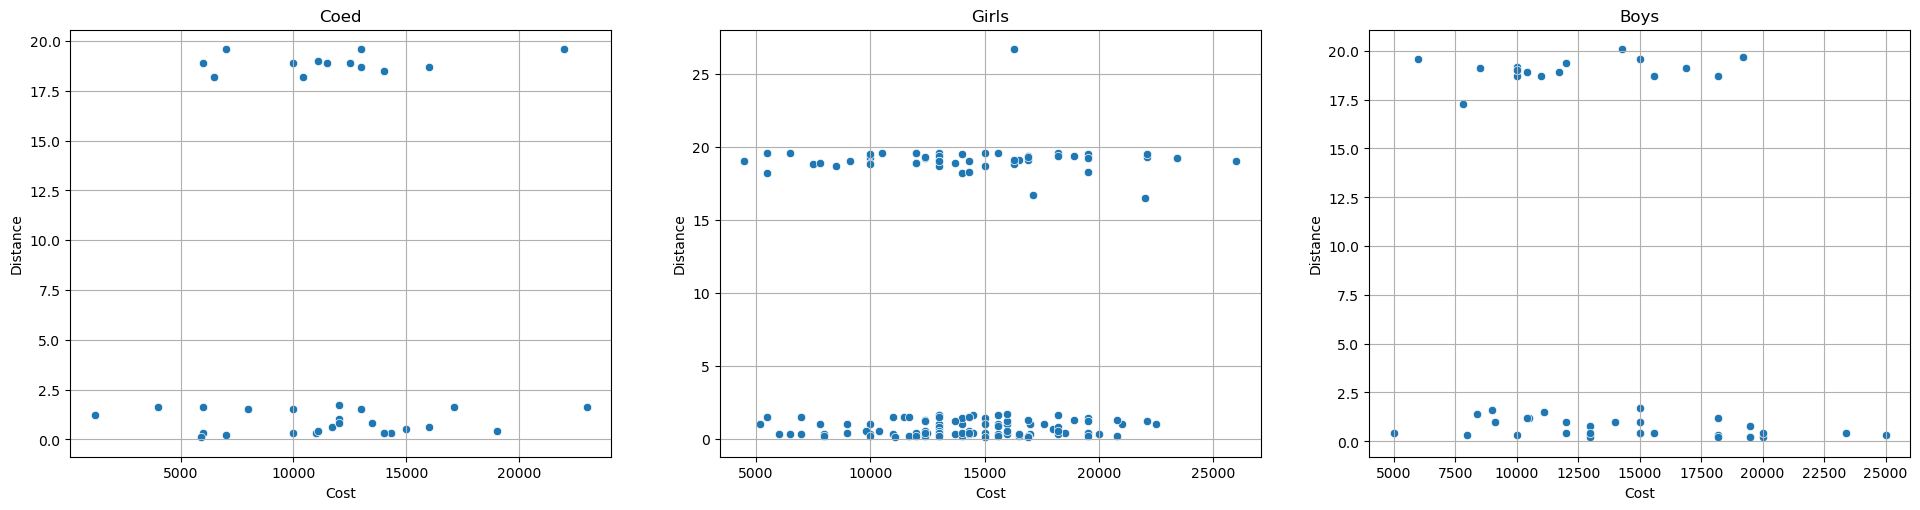

In [108]:
plt.subplot(1,3,1)
sns.scatterplot(x=df3[df3["Gender"]=="Coed"].drop("Distance",axis=1)["Cost"].to_list(),y=df3[df3["Gender"]=="Coed"].drop("Cost",axis=1)["Distance"].to_list())
plt.grid()
plt.title("Coed")
plt.xlabel("Cost")
plt.ylabel("Distance")

plt.subplot(1,3,2)
sns.scatterplot(x=df3[df3["Gender"]=="Girls"].drop("Distance",axis=1)["Cost"].to_list(),y=df3[df3["Gender"]=="Girls"].drop("Cost",axis=1)["Distance"].to_list())
plt.grid()
plt.title("Girls")
plt.xlabel("Cost")
plt.ylabel("Distance")

plt.subplot(1,3,3)
sns.scatterplot(x=df3[df3["Gender"]=="Boys"].drop("Distance",axis=1)["Cost"].to_list(),y=df3[df3["Gender"]=="Boys"].drop("Cost",axis=1)["Distance"].to_list())
plt.grid()
plt.title("Boys")
plt.xlabel("Cost")
plt.ylabel("Distance")

plt.subplots_adjust(left=None, bottom=None, right=3, top=1, wspace=None, hspace=None)
plt.show()

### Observations
- We notice that most of the pg's  located further from the colleges charge a lower amount. Thus proving the earlier found correlation data.

### Share of each gender

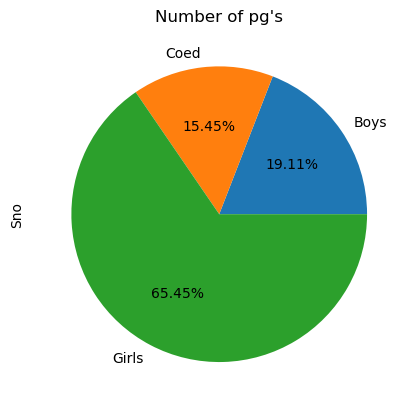

In [116]:
df1.groupby("Gender").sum()["Sno"].plot.pie(autopct="%1.2f%%")
plt.title("Number of pg's")
plt.show()

# Inferences
## On the basis of the observations made from the analysis of the given data, we can conclude the following-
### In general the number of girls pg is a lot more than boys and coed. This can be atrributed to the fact that in general girls pg charge a fee and thus it is more profitable to own a girls pg.
### Coed has the least number of pg's.
### The percentage of boys pg located far from the college is higher than those of female and coed.
### We also make out the basic fact that as distance from the college increases, the cost of those pgs reduce.
### We find that in general boys pg's cost a lot lesser than coed and girls, but simultaeneously also haver fewer facilities.